In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

from acquire import acquire_store

# plotting defaults
plt.rc('figure', figsize=(11, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [39]:
df = acquire_store()
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


In [40]:
df.shape

(913000, 7)

In [41]:
df['total_price'] = df['sale_amount'] * df['item_price']
df.head()

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,total_price
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,10.92
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,9.24
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,11.76
3,2013-01-04,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,10.92
4,2013-01-05,10,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253,8.40


In [42]:
# Reassign the sale_date column to be a datetime type
df.sale_date = pd.to_datetime(df.sale_date)

# Sort rows by the date and then set the index as that date
df = df.set_index("sale_date").sort_index()


In [43]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end


In [44]:
train.shape, test.shape

((639100, 7), (273900, 7))

In [45]:
y = df['total_price']

In [46]:
y.head()

sale_date
2013-01-01     10.92
2013-01-01    218.40
2013-01-01    125.55
2013-01-01    453.60
2013-01-01    294.00
Name: total_price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

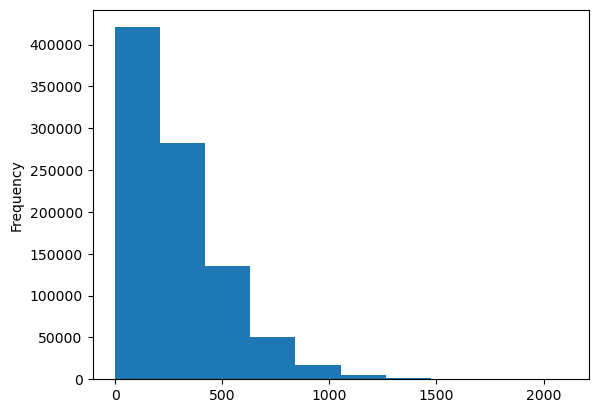

In [47]:
y.plot.hist()

[Text(0.5, 1.0, 'Average Price by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Price ($)')]

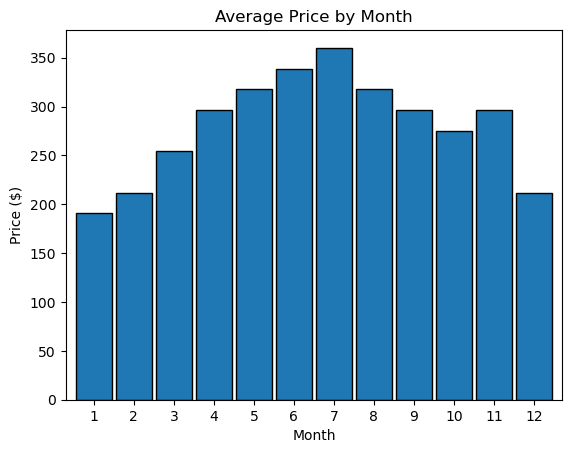

In [48]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Price by Month', xlabel='Month', ylabel='Price ($)')

[Text(0.5, 1.0, 'Average Price by Store'),
 Text(0.5, 0, 'Store'),
 Text(0, 0.5, 'Price ($)')]

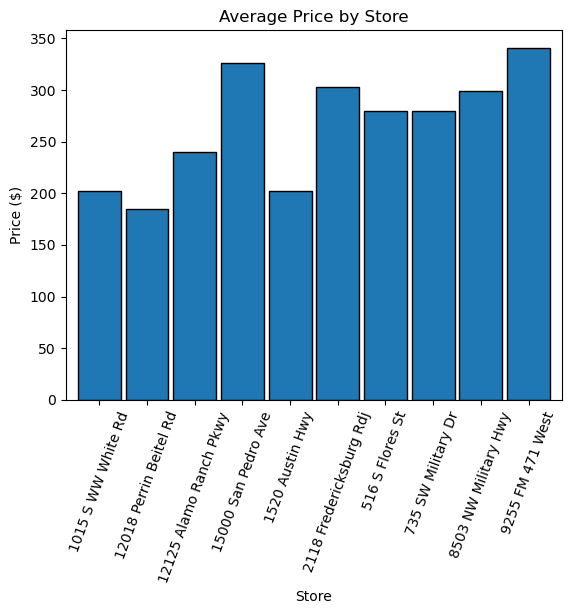

In [49]:
ax = train.groupby(train['store_address'])['total_price'].mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=70)
ax.set(title='Average Price by Store', xlabel='Store', ylabel='Price ($)')

[Text(0.5, 1.0, 'Average Price by Store'),
 Text(0.5, 0, 'Store'),
 Text(0, 0.5, 'Price ($)')]

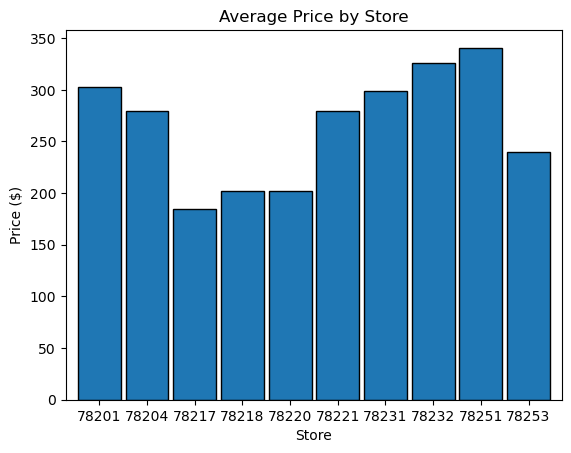

In [50]:
ax = train.groupby(train['store_zipcode'])['total_price'].mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Price by Store', xlabel='Store', ylabel='Price ($)')

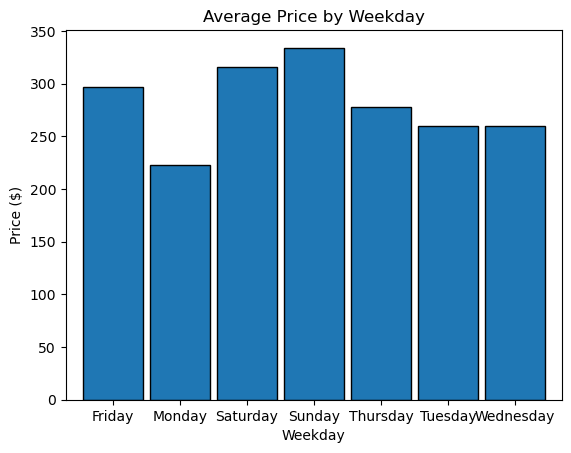

In [52]:
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Price by Weekday', xlabel='Weekday', ylabel='Price ($)')
plt.show()

<AxesSubplot:xlabel='weekday', ylabel='total_price'>

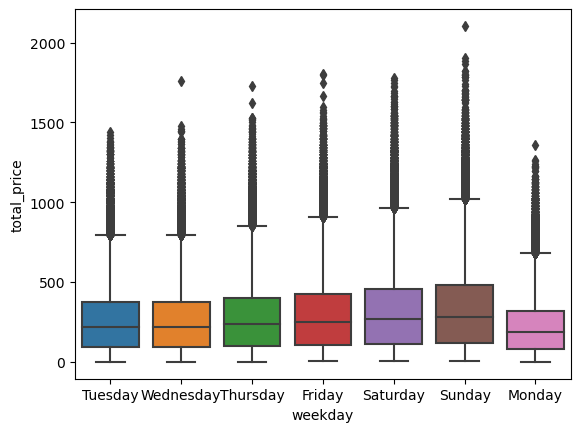

In [55]:
(
    y.reset_index()
    .assign(weekday=lambda df: df['sale_date'].dt.day_name())
    .pipe((sns.boxplot, 'data'), y='total_price', x='weekday')
)

<AxesSubplot:title={'center':'Weekly average'}, xlabel='sale_date'>

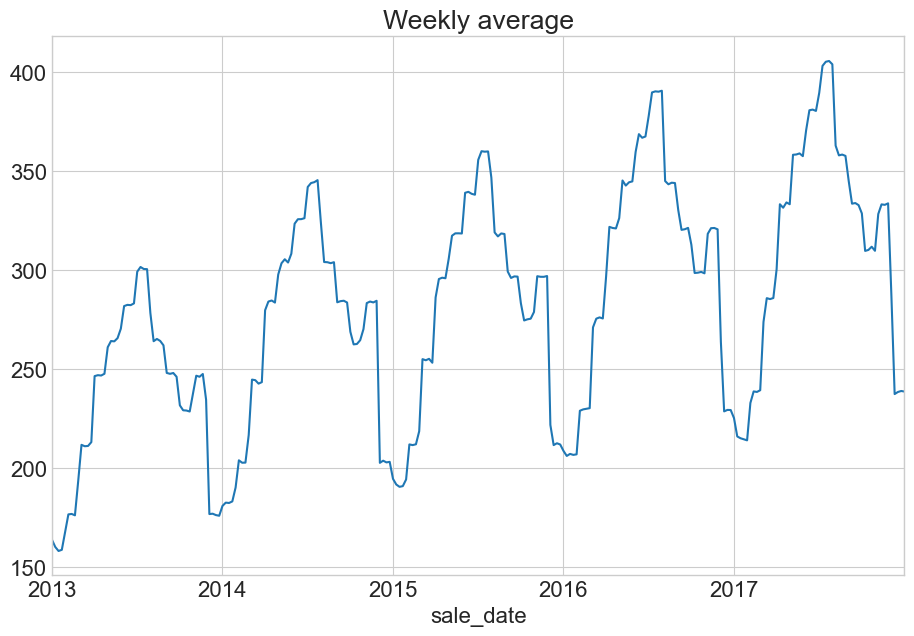

In [61]:
y.resample('W').mean().plot(title='Weekly average')

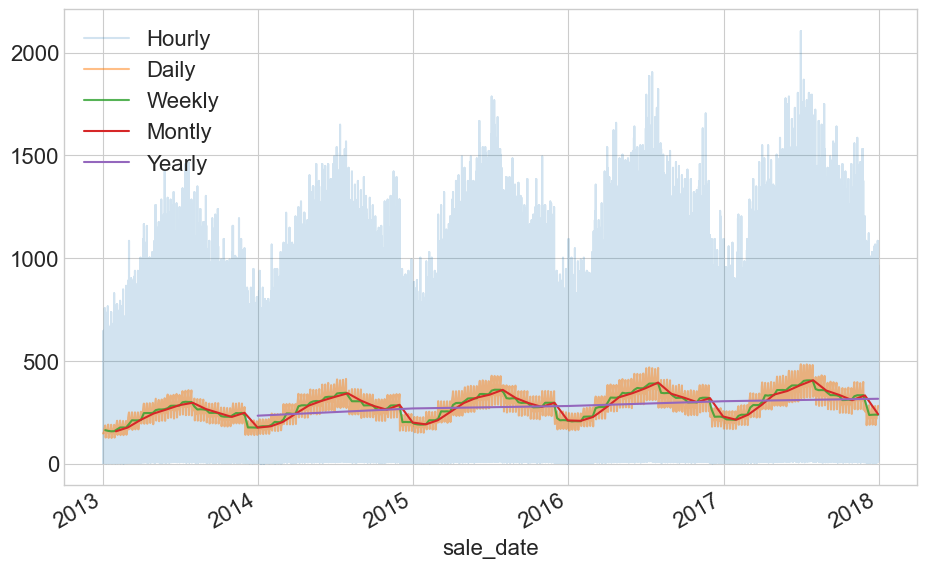

In [59]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()

<AxesSubplot:title={'center':'Average week-to-week change in total price'}, xlabel='sale_date'>

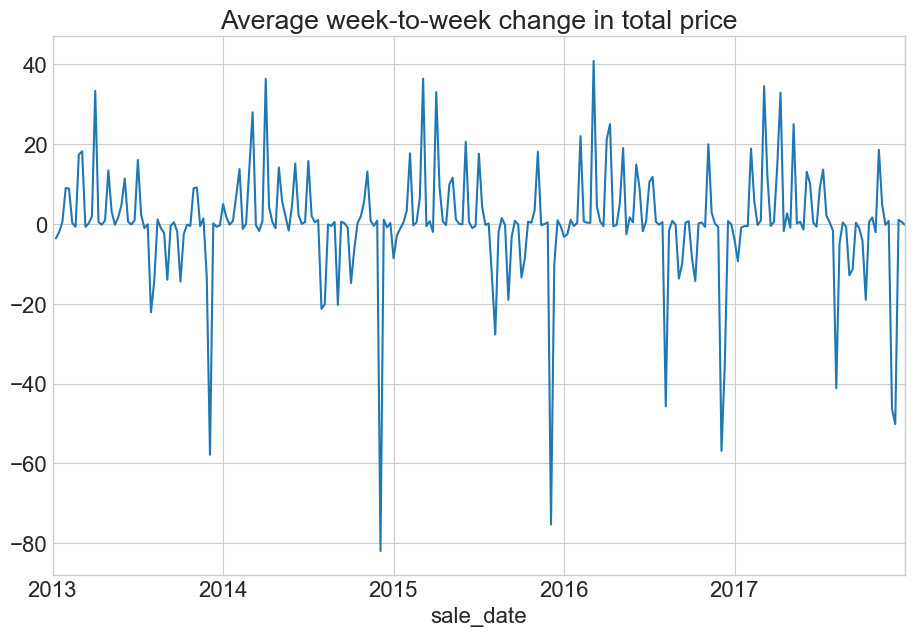

In [62]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in total price')

<AxesSubplot:title={'center':'Average month-to-month change in total price'}, xlabel='sale_date'>

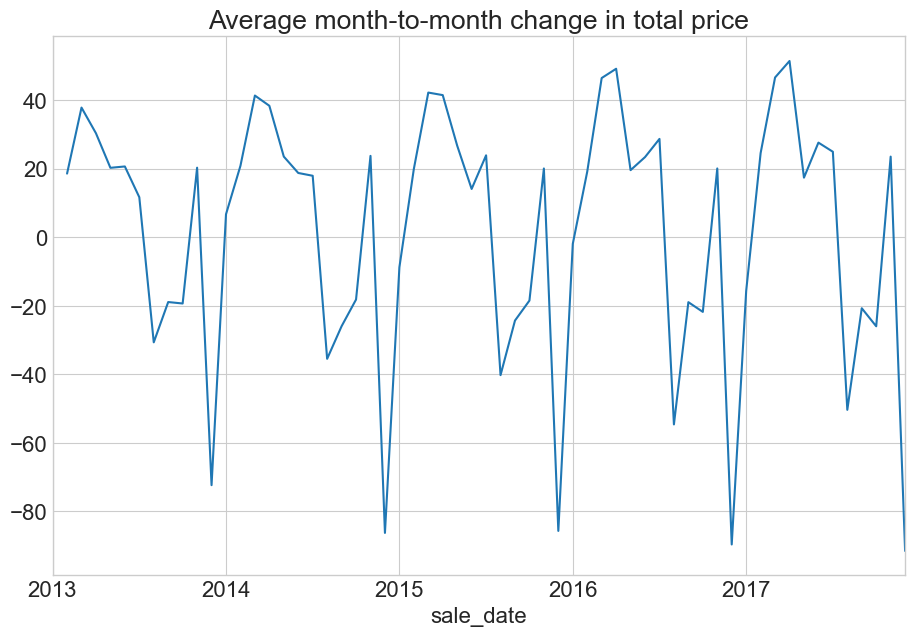

In [63]:
y.resample('M').mean().diff().plot(title='Average month-to-month change in total price')

<AxesSubplot:title={'center':'Seasonal Sales'}, xlabel='sale_date'>

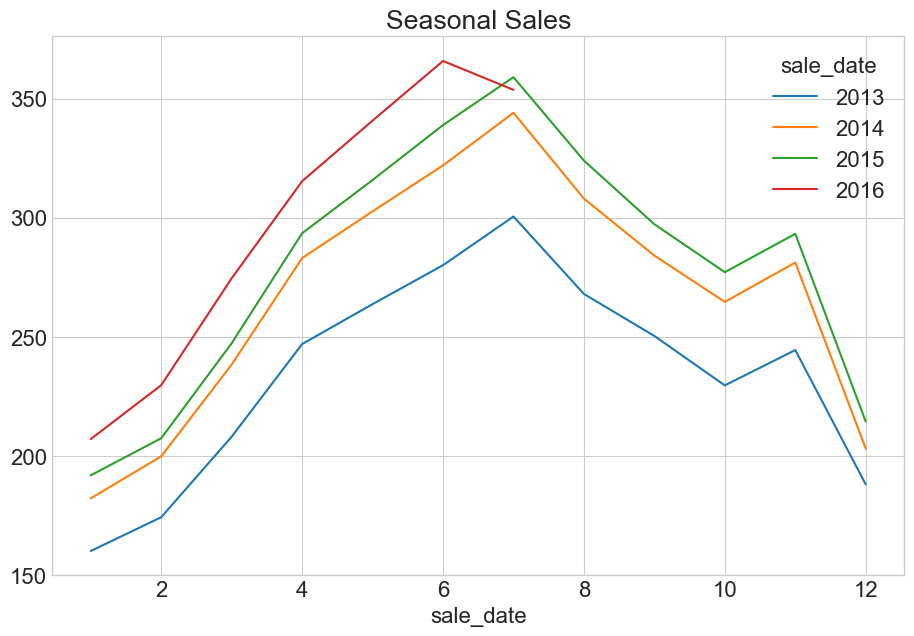

In [70]:
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Sales')

In [65]:
y = train['total_price'].resample('W').mean()

result = sm.tsa.seasonal_decompose(y)
decomposition = pd.DataFrame({
    'y': result.observed,
    'trend': result.trend,
    'seasonal': result.seasonal,
    'resid': result.resid,
})
decomposition.head()

,y,trend,seasonal,resid
sale_date,,,,
2013-01-06,163.589167,NaN,-77.817427,NaN
2013-01-13,159.981203,NaN,-76.420498,NaN
2013-01-20,157.946720,NaN,-77.661680,NaN
2013-01-27,158.545383,NaN,-77.653889,NaN
2013-02-03,167.585014,NaN,-73.077372,NaN


<AxesSubplot:xlabel='sale_date'>

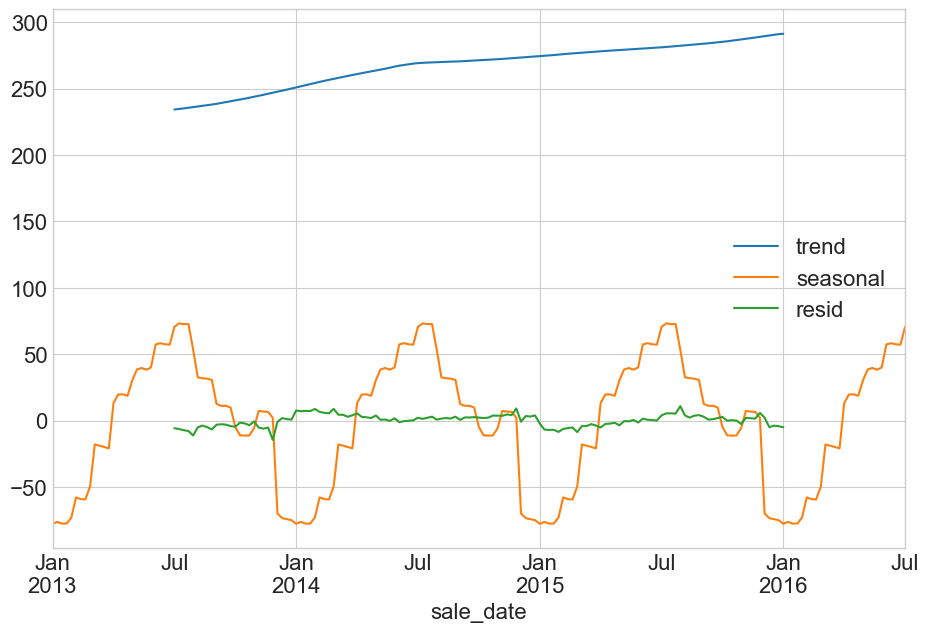

In [66]:
decomposition.iloc[:, 1:].plot()



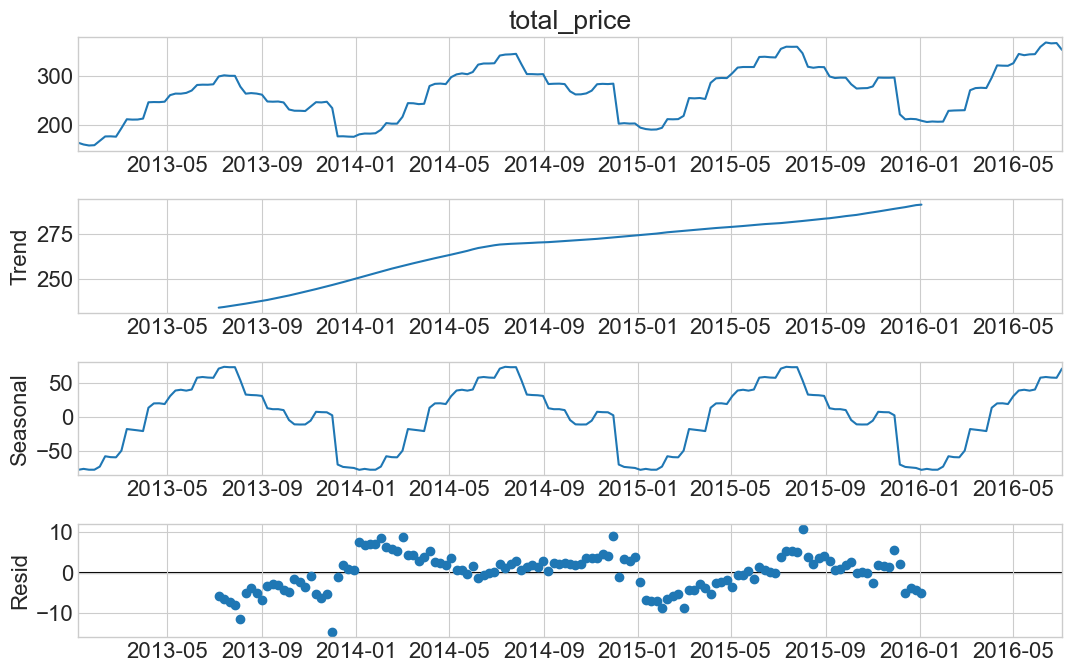

In [67]:
result.plot()
None

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

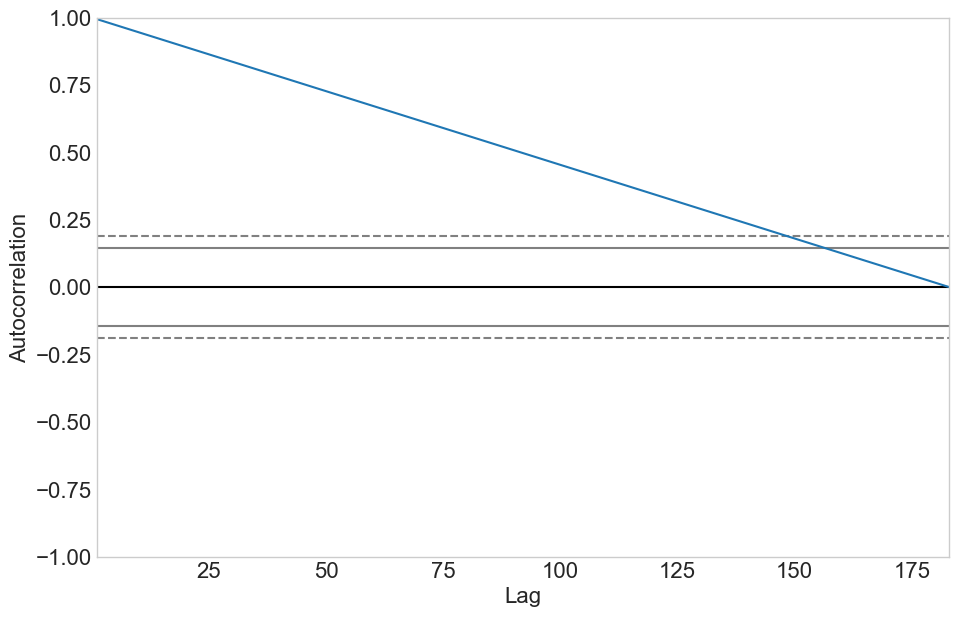

In [68]:
pd.plotting.autocorrelation_plot(train.resample('W').mean())

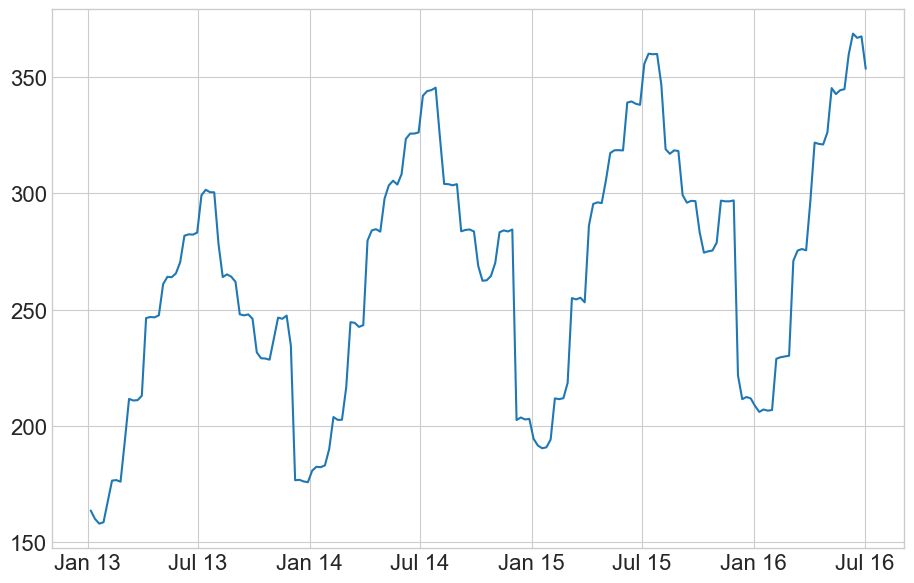

In [69]:
from matplotlib.dates import DateFormatter

fig, ax = plt.subplots()

weekly = y.resample('W').mean()

ax.plot(weekly.index, weekly)

ax.xaxis.set_major_formatter(DateFormatter('%b %y'))



In [72]:
df1 = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
df1.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [73]:
# Reassign the sale_date column to be a datetime type
df1['Date'] = pd.to_datetime(df1['Date'])

# Sort rows by the date and then set the index as that date
df1 = df1.set_index("Date").sort_index()

In [74]:
df1.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [75]:
df1.shape

(4383, 4)

In [76]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4383 entries, 2006-01-01 to 2017-12-31
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  4383 non-null   float64
 1   Wind         2920 non-null   float64
 2   Solar        2188 non-null   float64
 3   Wind+Solar   2187 non-null   float64
dtypes: float64(4)
memory usage: 171.2 KB


In [77]:
df1['Wind']

Date
2006-01-01        NaN
2006-01-02        NaN
2006-01-03        NaN
2006-01-04        NaN
2006-01-05        NaN
               ...   
2017-12-27    394.507
2017-12-28    506.424
2017-12-29    584.277
2017-12-30    721.247
2017-12-31    721.176
Name: Wind, Length: 4383, dtype: float64

In [78]:
y = df1['Consumption']

<AxesSubplot:ylabel='Frequency'>

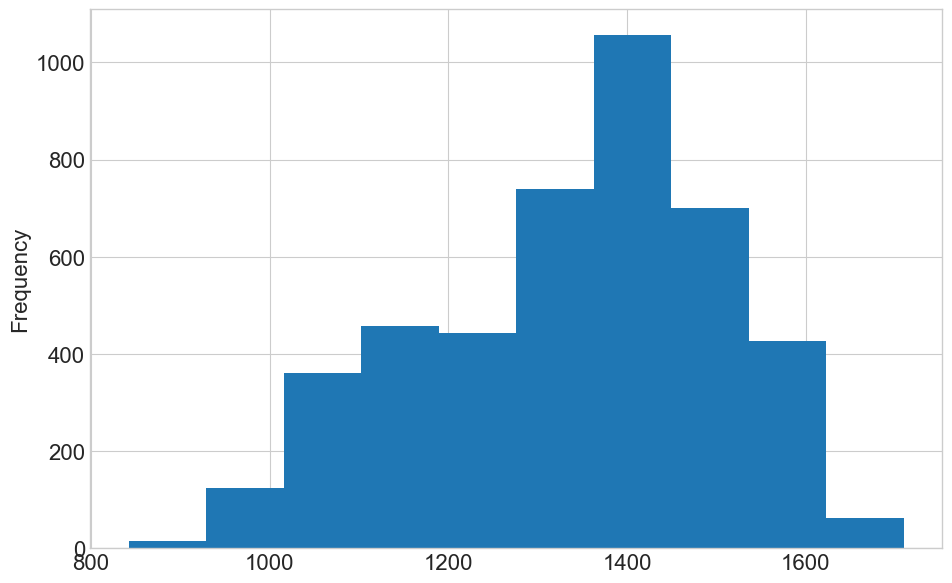

In [79]:
y.plot.hist()

[Text(0.5, 1.0, 'Average Consumption by Month'),
 Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Consumption')]

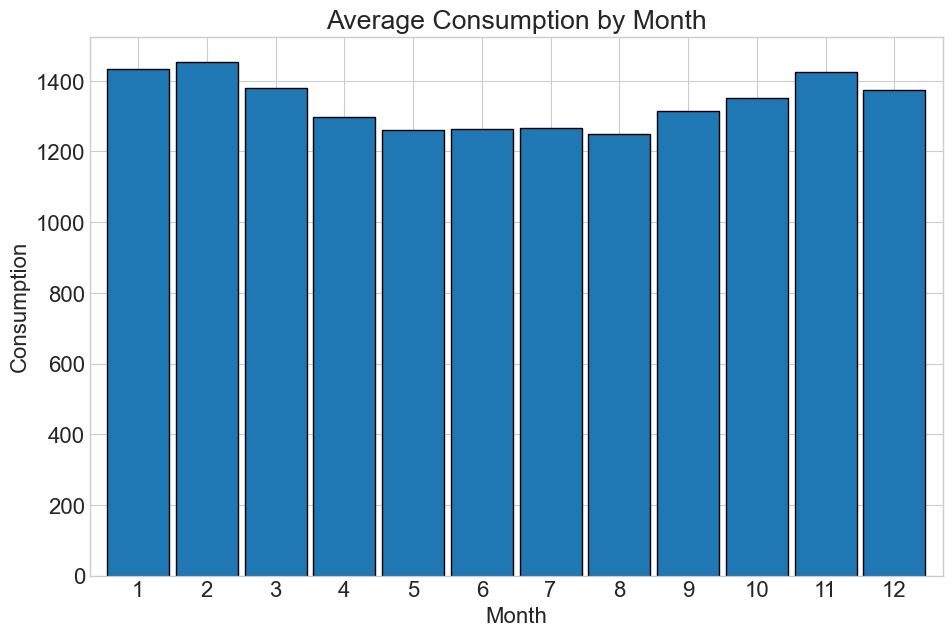

In [80]:
ax = y.groupby(y.index.month).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Month', xlabel='Month', ylabel='Consumption')

[Text(0.5, 1.0, 'Average Consumption by Weekday'),
 Text(0.5, 0, 'Weekday'),
 Text(0, 0.5, 'Consumption')]

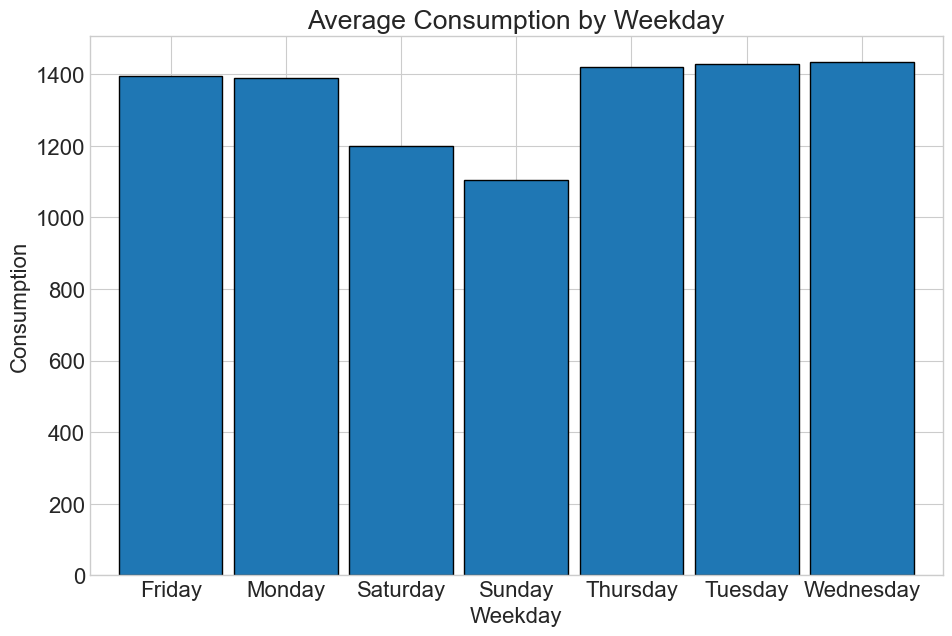

In [82]:
ax = y.groupby(y.index.day_name()).mean().plot.bar(width=.9, ec='black')
plt.xticks(rotation=0)
ax.set(title='Average Consumption by Weekday', xlabel='Weekday', ylabel='Consumption')

<AxesSubplot:xlabel='weekday', ylabel='Consumption'>

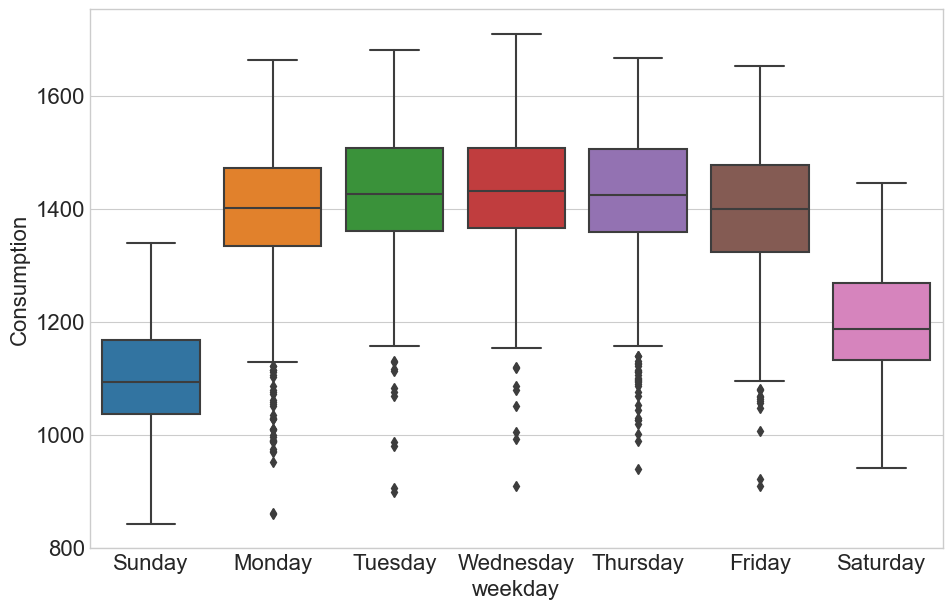

In [83]:
(
    y.reset_index()
    .assign(weekday=lambda df: df['Date'].dt.day_name())
    .pipe((sns.boxplot, 'data'), y='Consumption', x='weekday')
)

<AxesSubplot:title={'center':'Weekly average'}, xlabel='Date'>

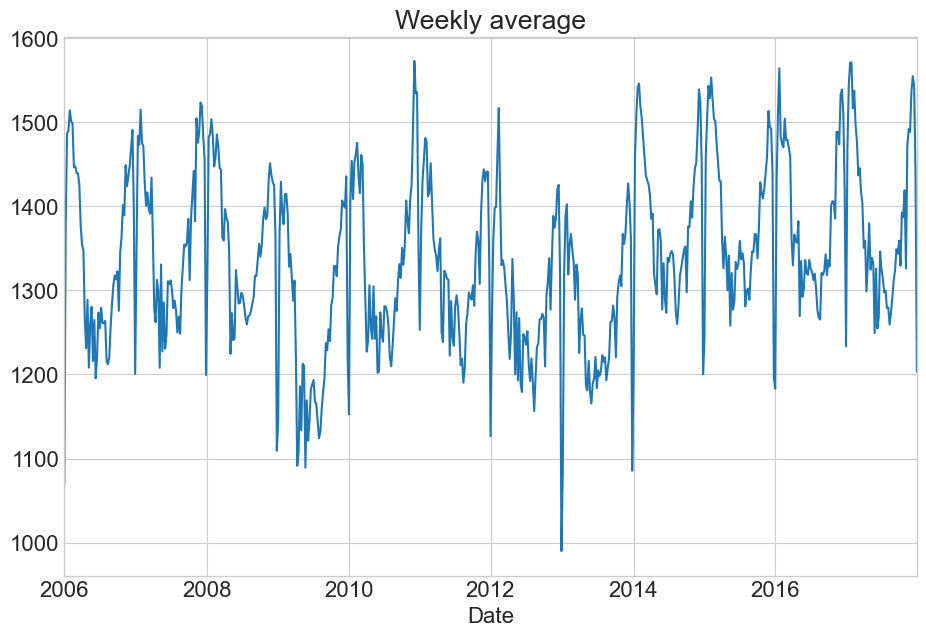

In [84]:
y.resample('W').mean().plot(title='Weekly average')

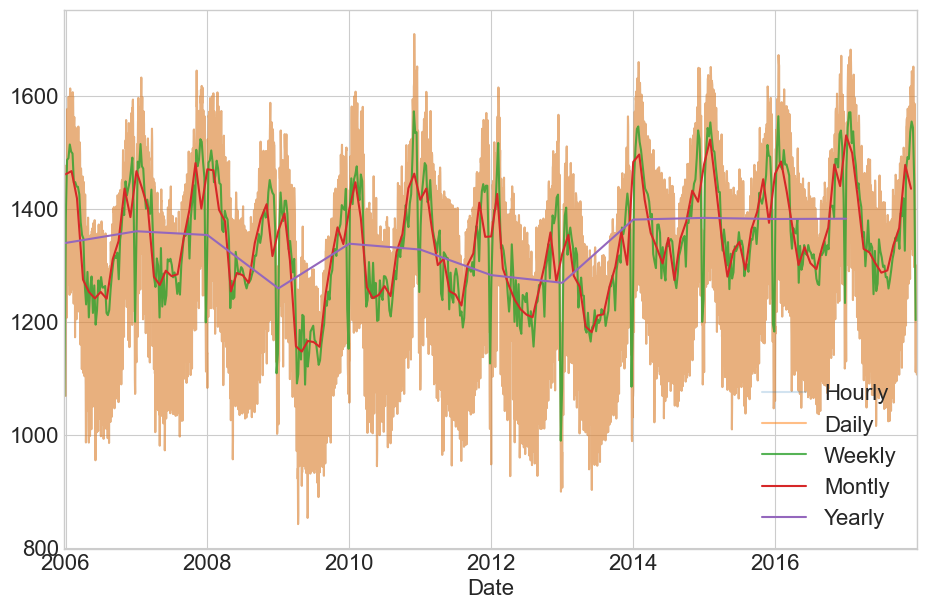

In [85]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().plot(alpha=.5, label='Daily')
y.resample('W').mean().plot(alpha=.8, label='Weekly')
y.resample('M').mean().plot(label='Montly')
y.resample('Y').mean().plot(label='Yearly')
plt.legend()